As a burgler robs a house, she finds the following items:

Dirt - Weight: 4, Value: 0
Computer - Weight: 10, Value: 30
Fork - Weight: 5, Value: 1
Problem Set - Weight: 0, Value: -10

This time, she can only carry a weight of 14, and wishes to maximize the value to weight ratio of the things she carries. She employs three different metrics in an attempt to do this, and writes an algorithm in Python to determine which loot to take.

The algorithm works as follows:

Evaluate the metric of each item. Each metric returns a numerical value for each item.
For each item, from highest metric value to lowest, add the item if there is room in the bag.
Describe the heuristic that each of the following 3 metrics uses, and choose the result of running the algorithm with each metric.

In [90]:
class Item(object):
    def __init__(self, name, weight, value):
        self.name = name
        self.value = value
        self.weight = weight

    def getName(self):
        return self.name

    def getValue(self):
        return self.value

    def getWeight(self):
        return self.weight

    def __str__(self):
        return '\n{:>15}: <value: {:>3}, weight: {:>3}>'.format(self.name, self.value, self.weight)

    __repr__ = __str__


In [91]:
# Item(name, weight, value)
items = [
    Item('Dirt', 4, 0),
    Item('Computer', 10, 30),
    Item('Fork', 5, 1),
    Item('Problem Set', 0, -10)
]
#optimum solution is value of 30

In [104]:
# Item(name, weight, value)
book_items = [
    Item('Clock', 10, 175),
    Item('Painting', 9, 90),
    Item('Radio', 4, 20),
    Item('Vase', 2, 50),
    Item('Book', 1, 10),
    Item('Computer', 20, 200)
]
# optimum solution is a value of 275

In [92]:
# heuristic highest value-to-weight ratio
def metric1(item):
    return item.getValue() / item.getWeight()

In [93]:
# heuristic lightest object first
def metric2(item):
    return  -item.getWeight()

In [141]:
# heuristic most valuable object first
def metric3(item):
    return item.getValue()

In [108]:
# greedy algorithm most to least
def greedy(items, metric,  maxWeight=14):
    sorted_items = sorted(items, key=metric, reverse=True)

    result = []
    totalValue = 0.0
    totalWeight = 0.0

    print('Ranking by {}:'.format(metric.__name__))
    for item in sorted_items:
        print("{:>15} = {:>4.1f}".format(item.getName(), metric(item)))
        if totalWeight + item.getWeight() <= maxWeight:
            result.append(item)
            totalWeight += item.getWeight()
            totalValue += item.getValue()


    return (result, totalValue)

# Exercise 1

In [96]:
knapsack, value = greedy(items, metric1)
print('Items in the knapsack - metric1: ', knapsack)
print("value: ", value)

ZeroDivisionError: division by zero

In [97]:
knapsack, value = greedy(items, metric2)
print('Items in the knapsack - metric2: ', knapsack)
print("value: ", value)

Ranking by metric2:
    Problem Set =  0.0
           Dirt = -4.0
           Fork = -5.0
       Computer = -10.0
Items in the knapsack - metric2:  [
    Problem Set: <value: -10, weight:   0>, 
           Dirt: <value:   0, weight:   4>, 
           Fork: <value:   1, weight:   5>]
value:  -9.0


In [98]:
knapsack, value = greedy(items, metric3)
print('Items in the knapsack - metric3: ', knapsack)
print("value: ", value)

Ranking by metric3:
       Computer = 30.0
           Fork =  1.0
           Dirt =  0.0
    Problem Set = -10.0
Items in the knapsack - metric3:  [
       Computer: <value:  30, weight:  10>, 
           Dirt: <value:   0, weight:   4>, 
    Problem Set: <value: -10, weight:   0>]
value:  20.0


# Book Exercise

In [105]:
knapsack, value = greedy(book_items, metric1, 20)
print('Book items in the knapsack - metric1: ', knapsack)
print("value: ", value)

Ranking by metric1:
           Vase = 25.0
          Clock = 17.5
       Painting = 10.0
           Book = 10.0
       Computer = 10.0
          Radio =  5.0
Book items in the knapsack - metric1:  [
           Vase: <value:  50, weight:   2>, 
          Clock: <value: 175, weight:  10>, 
           Book: <value:  10, weight:   1>, 
          Radio: <value:  20, weight:   4>]
value:  255.0


In [106]:
knapsack, value = greedy(book_items, metric2, 20)
print('Book items in the knapsack - metric2: ', knapsack)
print("value: ", value)

Ranking by metric2:
           Book = -1.0
           Vase = -2.0
          Radio = -4.0
       Painting = -9.0
          Clock = -10.0
       Computer = -20.0
Book items in the knapsack - metric2:  [
           Book: <value:  10, weight:   1>, 
           Vase: <value:  50, weight:   2>, 
          Radio: <value:  20, weight:   4>, 
       Painting: <value:  90, weight:   9>]
value:  170.0


In [110]:
knapsack, value = greedy(book_items, metric3, 20)
print('Book items in the knapsack - metric3: ', knapsack)
print("value: ", value)

Ranking by metric3:
       Computer = 200.0
          Clock = 175.0
       Painting = 90.0
           Vase = 50.0
          Radio = 20.0
           Book = 10.0
Book items in the knapsack - metric3:  [
       Computer: <value: 200, weight:  20>]
value:  200.0


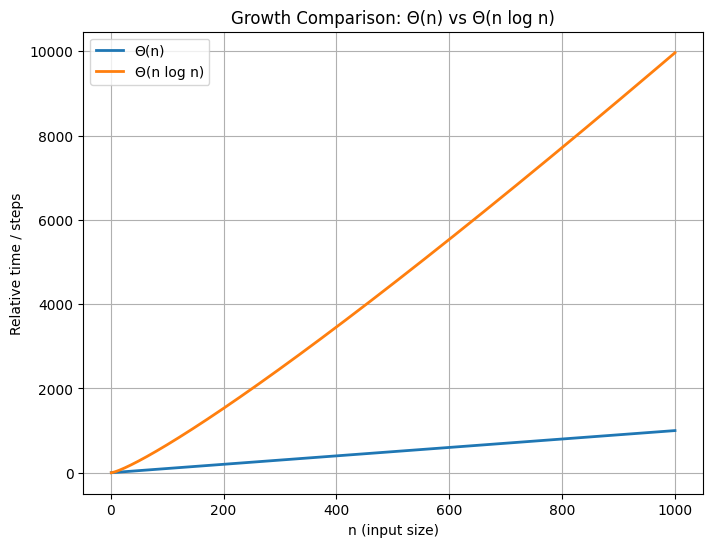

In [111]:
import numpy as np
import matplotlib.pyplot as plt

# Define range of n
n = np.arange(1, 1001)

# Define functions
linear = n
nlogn = n * np.log2(n)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(n, linear, label='Θ(n)', linewidth=2)
plt.plot(n, nlogn, label='Θ(n log n)', linewidth=2)
plt.title("Growth Comparison: Θ(n) vs Θ(n log n)")
plt.xlabel("n (input size)")
plt.ylabel("Relative time / steps")
plt.legend()
plt.grid(True)
plt.show()


When we describe an algorithm’s running time using asymptotic notation — Θ, O, or Ω — we are describing how fast the runtime grows as the input size n becomes very large.

We are not concerned with small constant factors (like 2n vs. 3n), but with the shape or growth trend of the function as n increases.

That’s why we say it’s asymptotic — it’s about the behavior “in the limit” as n → ∞.

We keep the term that grows the fastest and drop the others, because for large inputs, the smaller-growth terms contribute less and less to the total time.

That’s what we mean when we say:

“Asymptotic notation focuses on the dominant term.”

So for large n:

𝑛
log
⁡
𝑛
>
𝑛
nlogn>n

That’s why we say
Θ
(
𝑛
log
⁡
𝑛
)
Θ(nlogn) dominates
Θ
(
𝑛
)
Θ(n) — its curve rises faster.

Suppose we say that an approximation is not good enough, we want the best possible solution to this problem. The optimization problem, called **0/1 knapsack problem**.

The 0/1 knapsack problem is formalized as follows:
* Each item is represented by a pair _<value, weight>_.
* The knapsack can accommodate items with a total weight of no more than _w_
* The vector, _I_, length of _n_ represents the set of available items. Each element of the vector is an item
* A vector, _V_, of length n, is used to indicate whether or not each item is taken by the burglar. If V[[i] = 1, item I[i] is taken. If V[i] = 0, item I[i] is not taken.
* Find a V that maximizes

maximize i=0∑n−1​V[i]×I[i].value

subject to

i=0∑n−1​V[i]×I[i].weight≤W


## Greedy algorithms continued


In [128]:
class Food(object):
    def __init__(self, name, calories, value):
        self.name = name
        self.value = value
        self.calories = calories

    def getName(self):
        return self.name

    def getValue(self):
        return self.value

    def getCalories(self):
        return self.calories

    def getValueDensity(self):
        return self.getValue() / self.getCalories()

    def __str__(self):
        return '\n{:>15}: <value: {:>3}, calories: {:>3}>'.format(self.name, self.value, self.calories)

    __repr__ = __str__

In [133]:
def buildMenu(names, values, calories):
    """names, values, calories list of same length.
    name a list of strings
    values and calories lists of numbers
    returns list of Foods"""
    menu = []
    for i in range(len(values)):
        menu.append(Food(names[i], calories[i], values[i]))
    return menu


In [134]:
def greedy_too(items, maxCost, keyFunction):
    """Assumes items is a list; maxCost >= 0.
       keyFunction(item) -> number used for sorting (higher is better)."""
    itemsCopy = sorted(items, key=keyFunction, reverse=True)

    result = []
    totalValue = 0.0
    totalCost = 0.0

    for item in itemsCopy:
        if totalCost + item.getCalories() <= maxCost:
            result.append(item)
            totalCost += item.getCalories()
            totalValue += item.getValue()

    return result, totalValue


In [135]:
names = ['wine', 'beer', 'pizza', 'burger', 'fries', 'coke', 'apple', 'donut']
values = [20, 5, 40, 35, 30, 5, 45, 50]
calories = [123, 154, 258, 354, 365, 150, 95, 195]
menu = buildMenu(names, values, calories)
taken, val = greedy_too(menu, 800, Food.getValueDensity)
for meal in taken:
    print('  ', meal)

   
          apple: <value:  45, calories:  95>
   
          donut: <value:  50, calories: 195>
   
           wine: <value:  20, calories: 123>
   
          pizza: <value:  40, calories: 258>


In [140]:
def show_strategy(title, key_fn, maxCalories=600):
    taken, total = greedy_too(menu, maxCalories, key_fn)
    tot_cals = sum(x.getCalories() for x in taken)
    print(f"\n{title}: total value={total}, total calories={tot_cals}")
    for m in taken:
        print(" ", m)

show_strategy("Greedy by value", Food.getValue)
show_strategy("Greedy by calories", lambda x : 1/Food.getCalories(x))
show_strategy("Greedy by value density", Food.getValueDensity)



Greedy by value: total value=135.0, total calories=548
  
          donut: <value:  50, calories: 195>
  
          apple: <value:  45, calories:  95>
  
          pizza: <value:  40, calories: 258>

Greedy by calories: total value=75.0, total calories=522
  
          apple: <value:  45, calories:  95>
  
           wine: <value:  20, calories: 123>
  
           coke: <value:   5, calories: 150>
  
           beer: <value:   5, calories: 154>

Greedy by value density: total value=120.0, total calories=563
  
          apple: <value:  45, calories:  95>
  
          donut: <value:  50, calories: 195>
  
           wine: <value:  20, calories: 123>
  
           coke: <value:   5, calories: 150>


In [137]:
# Suppose we have items as a list of (value, weight) tuples
items = [(175, 10), (90, 9), (20, 4), (50, 2), (10, 1)]
W = 14  # total capacity

# V is a binary vector (0/1) indicating which items are included
# For example, V = [1, 0, 0, 1, 1] means items 0, 3, and 4 are taken
V = [1, 0, 0, 1, 1]

# Compute total value
total_value = sum(V[i] * items[i][0] for i in range(len(items)))

# Compute total weight
total_weight = sum(V[i] * items[i][1] for i in range(len(items)))

# Check constraint
if total_weight <= W:
    print("Feasible solution")
else:
    print("Over capacity")

print("Total value:", total_value)
print("Total weight:", total_weight)


Feasible solution
Total value: 235
Total weight: 13


In [113]:
from itertools import product

def knapsack_bruteforce(items, W):
    n = len(items)
    best_value = 0
    best_V = None

    for V in product([0, 1], repeat=n):  # all 2^n combinations
        total_value = sum(V[i] * items[i][0] for i in range(n))
        total_weight = sum(V[i] * items[i][1] for i in range(n))

        if total_weight <= W and total_value > best_value:
            best_value = total_value
            best_V = V

    return best_V, best_value


In [114]:
best_combo, max_value = knapsack_bruteforce(items, W)
print("Best selection:", best_combo)
print("Max value:", max_value)


Best selection: (1, 0, 0, 1, 1)
Max value: 235
